# Metadata Explorer

A notebook to explore the metadata so we know where to look for things!

### Import some libraries

In [1]:
import os
import sys
from socket import gethostname

hostname = gethostname()

if hostname.startswith('hpc-node'):
    IN_DEEPTHOUGHT = True
    sys.path.append('..')
else:
    IN_DEEPTHOUGHT = False
from cf_analysis_lib.load_libraries import *
import cf_analysis_lib


### Read the data

In [2]:
sequence_type = 'MGI_minion'
metadata = cf_analysis_lib.read_metadata(datadir, sequence_type)
metadata.head(5)

,minion,MGI,pwCF_ID,Sample date,IP vs OP,Hospital,Room,Age,Age groups,Paediatric vs Adult,...,Sum of meds,Sum of antifungals,Sum of steroid + mabs,DNA_extraction_ conc,SAGC ULN,DNA Conc. (ng/ul),Index I7,Index I5,Mean_Size_BP,Total Clusters Passing Filter (Million)
NAME,,,,,,,,,,,,,,,,,,,,,
1068841_20180306_S,1068841_20180306_S,1068841_20180306_S,1068841,3/06/2018,OP,RAH,Chest Clinic 7,47,7,Adult,...,0,0,0,1.070,SAGCFN_22_01754,42.8,CGCTCATT,ATAGAGGC,417,2.8
1085876_20180227_S,NaN,1085876_20180227_S,1085876,2/27/2018,OP,RAH,Chest Clinic 6,40,6,Adult,...,1,0,0,0.132,SAGCFN_22_01828,19.0,AGCGATAG,GGCTCTGA,674,2.5
1128691_20171206_S,NaN,1128691_20171206_S,1128691,12/06/2017,IP,RAH,RAH 8E 05,47,7,Adult,...,3,0,0,1.750,SAGCFN_22_01748,33.4,TCCGGAGA,GGCTCTGA,535,4.5
1128691_20171218_S,1128691_20171218_S,1128691_20171218_S,1128691,12/18/2017,OP,RAH,Chest Clinic 1,47,7,Adult,...,1,0,0,3.400,SAGCFN_22_01743,30.8,ATTACTCG,CAGGACGT,352,4.8
1128691_20180116_S,1128691_20180116_S,1128691_20180116_S,1128691,1/16/2018,OP,RAH,Chest Clinic 4,47,7,Adult,...,1,0,0,0.708,SAGCFN_22_01772,27.4,ATTCAGAA,GGCTCTGA,500,3.8


In [3]:
len(metadata.columns)

166

In [4]:
for col in metadata.columns:
    counts = metadata[col].value_counts()
    if len(counts) > 3:
        print(f"{col}\t{len(counts)} values")
    else:    
        summary = "; ".join([f"{cat}: {count}" for cat, count in counts.items()])
        print(f"{col}\t{summary}")

minion	61 values
MGI	127 values
pwCF_ID	64 values
Sample date	75 values
IP vs OP	IP: 66; OP: 61
Hospital	WCH: 94; RAH: 33
Room	59 values
Age	30 values
Age groups	7 values
Paediatric vs Adult	Paediatric: 93; Adult: 34
Gender	F: 69; M: 58
Sample_Type	S: 126; BAL: 1
H2_Uncorrected	45 values
CH4_Uncorrected	17 values
CO2	26 values
H2_Corrected	55 values
CH4_Corrected	22 values
CH4/H2 ratio_corrected	63 values
Corr.	29 values
Culture Result (Matched with sequenced sample)	60 values
NTM	0.0: 114; 1.0: 11
Pseudomonas Culture	0.0: 89; 1.0: 36
Cutured in previous 12 months	32 values
Others cultured	23 values
IgE	51 values
Spec IgE	32 values
Spec IgG	20 values
Precipitins	0.0: 25; 1.0: 12; 2.0: 10
FVC	54 values
FEV1	58 values
Best FEV1	39 values
FEV1/best FEV1	104 values
FEV1_RATIO_SCORE	3.0: 47; 2.0: 40; 1.0: 38
FEV1_Obstruction_Rank	1.0: 114; 2.0: 11
Cystic Fibrosis related diabetes (CFRD)	No: 76; Impaired: 30; Yes: 21
Pancreatic insufficiency (PI)	Yes: 121; No: 4
CF gene 1	F508: 127
CF gene 2

In [5]:
metadata['CS_Inquilinus limosus'].dtypes

dtype('int64')

### 


In [6]:
for col in metadata.select_dtypes(include='int64').columns:
    counts = metadata[col].value_counts()
    if len(counts) > 3:
        # print(f"{col}\t{len(counts)} values")
        continue
    else:
        #summary = "; ".join([f"{cat}: {count}" for cat, count in counts.items()])
        if int(1) in counts:
            summary = f"{counts[int(1)]}"
        elif int(0) in counts and counts[int(0)] == 127:
            print(f"{col}\tNo positives")
        else:
            summary = "; ".join([f"{cat}: {count}" for cat, count in counts.items()])
        print(f"{col}\t{summary}")
    

CS_mucoid	19
CS_non-mucoid	13
CS_Pseudomonas aeruginosa	36
CS_Oral flora	31
CS_Stenophotomonas maltophilia	9
CS_Aspergillus fumigatus	22
CS_Aspergillus flavus	3
CS_Candida albicans	40
CS_Mycobacteroides abscessus	6
CS_Mycobacterium intracellulare	1
CS_Staphylococcus  aureus	28
CS_Inquilinus limosus	1
CS_Achromobacter xylosoxidans	3
CS_Burkholderia cepacia	1
CS_NTM_(Smear negative)	1
CS_Mycolicibacter terrae	1
CS_Aspergillus nidulans	2
CS_MAC_(Smear negative)	2
CS_Penicillium	3
CS_Aspergillus niger	1
CS_Aspergillus terreus	1
CS_Scedosporium apiospermum	No positives
CS_Scedosporium apiospermum	1
CS_Lomentospora prolificans	1
CS_Acremonium species	1
CS_MDR_Pseudomonas aeruginosa	14
CS_Haemophilus influenzae	1
CS_Scedosporium apiospermum.1	1
O_Penicillium species	9
O_Enterobacter cloacae	2
O_Aspergillus Flavus	8
O_Mycobacterium abscessus	5
O_Cupriavidus gilardii	4
O_Mycobacterium intracellular	1
O_Scedosporium apiospermum	No positives
O_Scedosporium apiospermum	1
O_Pseudomonas aeruginosa (

In [7]:
for c in metadata.columns:
    if 'pseudomon' in c.lower():
        print(c)

Pseudomonas Culture
CS_Pseudomonas aeruginosa
CS_MDR_Pseudomonas aeruginosa
P12M_2_Pseudomonas aeruginosa
N12M_Pseudomonas aeruginosa
N12M_Pseudomonas aeruginosa (multi-resistant)
O_Pseudomonas aeruginosa (multi-resistant)
O_Pseudomonas aeruginosa (non-mucoid)
O_Pseudomonas aeruginosa (mucoid)


In [8]:
metadata[['CS_Pseudomonas aeruginosa', 'CS_MDR_Pseudomonas aeruginosa', 'O_Pseudomonas aeruginosa (multi-resistant)', 'O_Pseudomonas aeruginosa (non-mucoid)', 'O_Pseudomonas aeruginosa (mucoid)']]

,CS_Pseudomonas aeruginosa,CS_MDR_Pseudomonas aeruginosa,O_Pseudomonas aeruginosa (multi-resistant),O_Pseudomonas aeruginosa (non-mucoid),O_Pseudomonas aeruginosa (mucoid)
NAME,,,,,
1068841_20180306_S,0,0,0,0,0
1085876_20180227_S,1,0,0,0,0
1128691_20171206_S,1,0,0,0,0
1128691_20171218_S,1,0,0,0,0
1128691_20180116_S,1,0,0,0,0
...,...,...,...,...,...
895293_20180502_S,1,1,0,0,0
896213_20180427_S,0,0,0,0,0
913873_20180417_S,0,0,0,0,0


In [9]:
metadata[metadata['CS_MDR_Pseudomonas aeruginosa'] == 1][['CS_Pseudomonas aeruginosa', 'CS_MDR_Pseudomonas aeruginosa']]

,CS_Pseudomonas aeruginosa,CS_MDR_Pseudomonas aeruginosa
NAME,,
1282052_20180206_S,1,1
1316935_20180417_S,1,1
1465461_20180406_S,1,1
1565754_20180403_S,1,1
1588281_20180508_S,1,1
1593967_20180424_S,1,1
1593973_20180427_S,1,1
1593973_20180504_S,1,1
658355_20180321_S,1,1


In [10]:
metadata[metadata['CS_Pseudomonas aeruginosa'] == 1][['CS_Pseudomonas aeruginosa', 'CS_MDR_Pseudomonas aeruginosa']].shape

(36, 2)

In [11]:
t = '"; "'.join(sorted(list(metadata.columns)))
print(f'"{t}"')

"1 Cephalexin_PO"; "1 Flucloaxcillin_PO"; "1 Itraconazole (Lozenoc)_PO"; "1 Sulfamethoxazole_trimethoprim (Bactrim)_PO"; "2 Amikacin_INH"; "2 Amoxicillin & Potassium clavulanate (Aug Duo)_PO"; "2 Amphotericin B (Ambisome)_INH"; "2 Azithromycin_PO"; "2 Ceftazidime_INH"; "2 Ciprofloxacin_PO"; "2 Clarithromycin_PO"; "2 Clofazimine PO"; "2 Colistin_IHN"; "2 prednisolone_PO"; "2 tobramycin_INH"; "3 Azithromycin_IV"; "3 Aztreonam_IV"; "3 Cefopime_IV"; "3 Ceftazidime_IV"; "3 Imipenem"; "3 Ivacaftor (Kalydeco)"; "3 Meropenem_IV"; "3 Methylpredinosolone_IV"; "3 Omalizumab_SC"; "3 piperacillin sodium, tazobactam sodium (Tazocin)_IV"; "3 tobramycin_IV"; "4 Amikacin_IV"; "4 Cefoxitin_IV"; "4 Colistin_IV"; "Age"; "Age groups"; "Antibiotics (duration)"; "Antibiotics_YN"; "Best FEV1"; "CF gene 1"; "CF gene 2"; "CFLD"; "CH4/H2 ratio_corrected"; "CH4_Corrected"; "CH4_Uncorrected"; "CO2"; "CS_Achromobacter xylosoxidans"; "CS_Acremonium species"; "CS_Aspergillus flavus"; "CS_Aspergillus fumigatus"; "CS_A

In [12]:
antibiotics = ['1 Cephalexin_PO', '1 Flucloaxcillin_PO', '1 Itraconazole (Lozenoc)_PO', '1 Sulfamethoxazole_trimethoprim (Bactrim)_PO', '2 Amikacin_INH', '2 Amoxicillin & Potassium clavulanate (Aug Duo)_PO', '2 Amphotericin B (Ambisome)_INH', '2 Azithromycin_PO', '2 Ceftazidime_INH', '2 Ciprofloxacin_PO', '2 Clarithromycin_PO', '2 Clofazimine PO', '2 Colistin_IHN', '2 prednisolone_PO', '2 tobramycin_INH', '3 Azithromycin_IV', '3 Aztreonam_IV', '3 Cefopime_IV', '3 Ceftazidime_IV', '3 Imipenem', '3 Ivacaftor (Kalydeco)', '3 Meropenem_IV', '3 Methylpredinosolone_IV', '3 Omalizumab_SC', '3 piperacillin sodium, tazobactam sodium (Tazocin)_IV', '3 tobramycin_IV', '4 Amikacin_IV', '4 Cefoxitin_IV', '4 Colistin_IV']

In [13]:
t = '"; "'.join(sorted(antibiotics))
print(f'"{t}"')

"1 Cephalexin_PO"; "1 Flucloaxcillin_PO"; "1 Itraconazole (Lozenoc)_PO"; "1 Sulfamethoxazole_trimethoprim (Bactrim)_PO"; "2 Amikacin_INH"; "2 Amoxicillin & Potassium clavulanate (Aug Duo)_PO"; "2 Amphotericin B (Ambisome)_INH"; "2 Azithromycin_PO"; "2 Ceftazidime_INH"; "2 Ciprofloxacin_PO"; "2 Clarithromycin_PO"; "2 Clofazimine PO"; "2 Colistin_IHN"; "2 prednisolone_PO"; "2 tobramycin_INH"; "3 Azithromycin_IV"; "3 Aztreonam_IV"; "3 Cefopime_IV"; "3 Ceftazidime_IV"; "3 Imipenem"; "3 Ivacaftor (Kalydeco)"; "3 Meropenem_IV"; "3 Methylpredinosolone_IV"; "3 Omalizumab_SC"; "3 piperacillin sodium, tazobactam sodium (Tazocin)_IV"; "3 tobramycin_IV"; "4 Amikacin_IV"; "4 Cefoxitin_IV"; "4 Colistin_IV"


In [14]:
combinations = {
'Amikacin' : ['2 Amikacin_INH', '4 Amikacin_IV'],
'Azithromycin' : ['2 Azithromycin_PO', '3 Azithromycin_IV'],
'Tobramycin' : ['2 tobramycin_INH', '3 tobramycin_IV'],
'Colistin' : ['2 Colistin_IHN', '4 Colistin_IV'],
'Ceftazidime' : ['2 Ceftazidime_INH', '3 Ceftazidime_IV'],
'Prednisolone' : ['2 prednisolone_PO', '3 Methylpredinosolone_IV']
}

In [15]:
metadata[(metadata['2 Amikacin_INH'] == 1) | (metadata['4 Amikacin_IV'] == 1)]

,minion,MGI,pwCF_ID,Sample date,IP vs OP,Hospital,Room,Age,Age groups,Paediatric vs Adult,...,Sum of meds,Sum of antifungals,Sum of steroid + mabs,DNA_extraction_ conc,SAGC ULN,DNA Conc. (ng/ul),Index I7,Index I5,Mean_Size_BP,Total Clusters Passing Filter (Million)
NAME,,,,,,,,,,,,,,,,,,,,,
650003_20180207_S,650003_20180207_S,650003_20180207_S,650003,2/07/2018,IP,WCH,Adol Room 1,17,3,Paediatric,...,5,0,0,0.5520,SAGCFN_22_01778,8.28,GAATTCGT,ATAGAGGC,476,5.7
650003_20180213_S,NaN,650003_20180213_S,650003,2/13/2018,IP,WCH,Level 6 Treatment,17,3,Paediatric,...,5,0,0,0.2890,SAGCFN_22_01800,27.60,TAATGCGC,GTACTGAC,572,3.5
670829_20171001_S,NaN,670829_20171001_S,670829,10/01/2017,IP,WCH,Adolescent 6,15,3,Paediatric,...,1,0,0,0.2800,SAGCFN_22_01803,41.80,CGGCTATG,CCTATCCT,375,2.2
670829_20171005_S,NaN,670829_20171005_S,670829,10/05/2017,IP,WCH,Adolescent 6,15,3,Paediatric,...,1,0,0,0.1020,SAGCFN_22_01836,5.16,ATGTTGCCAC,ATGGCTTCTA,668,4.0
670829_20180201_S,NaN,670829_20180201_S,670829,2/01/2018,IP,WCH,Day Surgery 17,16,3,Paediatric,...,2,1,0,0.0810,SAGCFN_22_01840,8.58,AGGTAACAAC,AGCATCGTGC,469,3.1
698917_20180119_S,698917_20180119_S,698917_20180119_S,698917,1/19/2018,IP,WCH,Adol Room 1,14,3,Paediatric,...,3,0,0,1.7600,SAGCFN_22_01747,23.20,TCCGGAGA,CCTATCCT,383,6.7
698917_20180128_S,698917_20180128_S,698917_20180128_S,698917,1/28/2018,IP,WCH,Adol Room 1,14,3,Paediatric,...,3,0,0,0.3370,SAGCFN_22_01793,21.00,TAATGCGC,TATAGCCT,495,2.2
698917_20180329_S,NaN,698917_20180329_S,698917,3/29/2018,OP,WCH,Day Surgery 19,14,3,Paediatric,...,6,0,0,0.0554,SAGCFN_22_01847,5.60,GAACCGCATT,AGGCATAATG,345,2.6
770560_20181218_S,NaN,770560_20181218_S,770560,12/18/2018,IP,WCH,Adolescent 4,12,3,Paediatric,...,3,0,0,0.1610,SAGCFN_22_01821,14.90,TCTCGCGC,AGGCGAAG,630,3.2


In [16]:
tmpdf = pd.DataFrame()
for new_col, col_array in combinations.items():
    tmpdf[new_col] = metadata[col_array].any(axis=1).astype(int)
tmpdf

,Amikacin,Azithromycin,Tobramycin,Colistin,Ceftazidime,Prednisolone
NAME,,,,,,
1068841_20180306_S,0,0,0,0,0,0
1085876_20180227_S,0,1,0,0,0,0
1128691_20171206_S,0,0,1,0,0,0
1128691_20171218_S,0,0,1,0,0,0
1128691_20180116_S,0,0,1,0,0,0
...,...,...,...,...,...,...
895293_20180502_S,0,0,0,0,0,0
896213_20180427_S,0,0,0,0,0,0
913873_20180417_S,0,0,0,0,0,0


In [17]:
tmpdf.sum()

Amikacin        10
Azithromycin     8
Tobramycin      47
Colistin         4
Ceftazidime     22
Prednisolone    10
dtype: int64

In [18]:
len(metadata['pwCF_ID'].unique())

64

Generate some statistics about our samples

In [19]:
sequence_type='MGI'

for taxa in ['kingdom', 'order', 'phylum', 'class', 'family', 'genus']:
    genus_otu = cf_analysis_lib.read_taxonomy(datadir, sequence_type, taxa)
    genus_otu = genus_otu.T
    print(f"The taxonomy df for {taxa} has shape: {genus_otu.shape}")

metadata = cf_analysis_lib.read_metadata(datadir, sequence_type, categorise=True)
print(f"The metadata df has shape: {metadata.shape}")


The taxonomy df for kingdom has shape: (127, 1)
The taxonomy df for order has shape: (127, 302)
The taxonomy df for phylum has shape: (127, 164)
The taxonomy df for class has shape: (127, 140)
The taxonomy df for family has shape: (127, 743)
The taxonomy df for genus has shape: (127, 3581)
The metadata df has shape: (127, 166)


In [20]:
for taxa in ['kingdom', 'order', 'phylum', 'class', 'family', 'genus']:
    genus_otu = cf_analysis_lib.read_taxonomy(datadir, sequence_type, taxa)
    genus_otu = genus_otu.T
    print(f"we have {genus_otu.shape[1]} taxonomic group for {taxa}, and ", end="")
print()

we have 1 taxonomic group for kingdom, and we have 302 taxonomic group for order, and we have 164 taxonomic group for phylum, and we have 140 taxonomic group for class, and we have 743 taxonomic group for family, and we have 3581 taxonomic group for genus, and 


In [21]:
for sslevel in ['all_norm_ss.tsv.gz', 'class_norm_ss.tsv.gz', 'level1_norm_ss.tsv.gz', 'level2_norm_ss.tsv.gz', 'subsystems_norm_ss.tsv.gz']:
    ss_df = cf_analysis_lib.read_subsystems(os.path.join(datadir, sequence_type, "FunctionalAnalysis", "subsystems", sslevel), sequence_type)
    ss_df = ss_df.T
    print(f"we have {ss_df.shape[1]} features for {sslevel.replace('_norm_ss.tsv.gz', '')} subsystems, and ", end="")
print()

we have 769 features for all subsystems, and we have 11 features for class subsystems, and we have 29 features for level1 subsystems, and we have 139 features for level2 subsystems, and we have 769 features for subsystems subsystems, and 


In [22]:
sslevel = 'all_norm_ss.tsv.gz'
ss_df = cf_analysis_lib.read_subsystems(os.path.join(datadir, sequence_type, "FunctionalAnalysis", "subsystems", sslevel), sequence_type)
ss_df = ss_df.T
print(f"The subsystems df for {sslevel} has shape: {ss_df.shape}")

The subsystems df for all_norm_ss.tsv.gz has shape: (127, 769)


In [23]:
os.path.join(datadir, sequence_type, "FunctionalAnalysis", "subsystems", sslevel)

'../MGI/FunctionalAnalysis/subsystems/all_norm_ss.tsv.gz'

In [24]:
intcol = 'CFLD'

lens = metadata[intcol].count()
noss = metadata[intcol].str.contains('No').sum()
yess = metadata[intcol].str.contains('Yes').sum()
print(f"No: {noss} Yes: {yess} tot: {noss+yess} len: {lens}")

No: 86 Yes: 28 tot: 114 len: 117


In [25]:
metadata[intcol].dropna().cat.categories

Index(['No', 'Unknown', 'Yes'], dtype='object')

In [26]:
tmp = metadata[metadata[intcol] != 'Unknown'].dropna()
tmp[intcol]

NAME
1593973_20180504_S    No
Name: CFLD, dtype: category
Categories (3, object): ['No', 'Unknown', 'Yes']

In [27]:
mask = metadata[intcol].notna() & (metadata[intcol] != 'Unknown')
tmpdf = metadata[mask]
tmpdf[tmpdf[intcol] == 'Unknown']

,minion,MGI,pwCF_ID,Sample date,IP vs OP,Hospital,Room,Age,Age groups,Paediatric vs Adult,...,Sum of meds,Sum of antifungals,Sum of steroid + mabs,DNA_extraction_ conc,SAGC ULN,DNA Conc. (ng/ul),Index I7,Index I5,Mean_Size_BP,Total Clusters Passing Filter (Million)
NAME,,,,,,,,,,,,,,,,,,,,,


In [28]:
for c in sorted(metadata.columns):
    if 'CS' in c:
        print(c)

CS_Achromobacter xylosoxidans
CS_Acremonium species
CS_Aspergillus flavus
CS_Aspergillus fumigatus
CS_Aspergillus nidulans
CS_Aspergillus niger
CS_Aspergillus terreus
CS_Burkholderia cepacia
CS_Candida albicans
CS_Haemophilus influenzae
CS_Inquilinus limosus
CS_Lomentospora prolificans
CS_MAC_(Smear negative)
CS_MDR_Pseudomonas aeruginosa
CS_Mycobacterium intracellulare
CS_Mycobacteroides abscessus
CS_Mycolicibacter terrae
CS_NTM_(Smear negative)
CS_Oral flora
CS_Penicillium
CS_Pseudomonas aeruginosa
CS_Scedosporium apiospermum
CS_Scedosporium apiospermum.1
CS_Staphylococcus  aureus
CS_Stenophotomonas maltophilia
CS_mucoid
CS_non-mucoid


In [29]:
for intcol in sorted(metadata.columns):
    if 'CS' in intcol:
        try:
            mn = metadata.groupby(intcol).size()[1]
        except KeyError as e:
            mn = "NOT KNOWN"
        print(f"{intcol}XXX{mn} pwCF")

CS_Achromobacter xylosoxidansXXX3 pwCF
CS_Acremonium speciesXXX1 pwCF
CS_Aspergillus flavusXXX3 pwCF
CS_Aspergillus fumigatusXXX22 pwCF
CS_Aspergillus nidulansXXX2 pwCF
CS_Aspergillus nigerXXX1 pwCF
CS_Aspergillus terreusXXX1 pwCF
CS_Burkholderia cepaciaXXX1 pwCF
CS_Candida albicansXXX40 pwCF
CS_Haemophilus influenzaeXXX1 pwCF
CS_Inquilinus limosusXXX1 pwCF
CS_Lomentospora prolificansXXX1 pwCF
CS_MAC_(Smear negative)XXX2 pwCF
CS_MDR_Pseudomonas aeruginosaXXX14 pwCF
CS_Mycobacterium intracellulareXXX1 pwCF
CS_Mycobacteroides abscessusXXX6 pwCF
CS_Mycolicibacter terraeXXX1 pwCF
CS_NTM_(Smear negative)XXX1 pwCF
CS_Oral floraXXX31 pwCF
CS_PenicilliumXXX3 pwCF
CS_Pseudomonas aeruginosaXXX36 pwCF
CS_Scedosporium apiospermumXXXNOT KNOWN pwCF
CS_Scedosporium apiospermum.1XXX1 pwCF
CS_Staphylococcus  aureusXXX28 pwCF
CS_Stenophotomonas maltophiliaXXX9 pwCF
CS_mucoidXXX19 pwCF
CS_non-mucoidXXX13 pwCF


In [30]:
intcol = 'CS_Aspergillus fumigatus'
metadata[intcol].values

[0, 0, 0, 0, 1, ..., 0, 1, 0, 0, 0]
Length: 127
Categories (2, int64): [0, 1]

In [31]:
intcol = 'CO2'
metadata[intcol].values

array([3.8, 2.9, 4. , 3.4, 3. , 3.4, 3.2, 2. , 3.6, 3.3, 3.2, 4. , 3.4,
       3. , 4.6, 3.2, 4.4, 4.5, 2.7, 2.8, 3.5, 3.7, 3.3, 4.4, 4.6, 5.7,
       3.6, nan, 5.2, 4.1, 4.2, 4. , 3.6, 3.8, 4.2, 4. , 3.6, 3.8, 3.3,
       4.2, 4. , 3.7, 3.1, 3.8, 3.2, 3. , 3.2, 3.2, 3.7, 2.5, 3.4, 3.7,
       3.8, 3.9, nan, 4.8, 4.2, 3.8, 3.6, 4.8, 4.2, 3.4, 3.7, 3.6, 4.6,
       3.3, 2.9, 3.6, 3.4, 4.6, 3.7, nan, nan, nan, 4.5, 4.3, 4.1, 4.8,
       nan, nan, 3.5, 3.9, 4. , 3.5, nan, nan, nan, nan, nan, 3.3, 2.9,
       3.9, 2.3, 4.6, 3.5, 3.6, 4. , 3.4, 3.4, 3.5, 2.8, 3.5, 5.2, 4. ,
       4.3, 4.5, nan, nan, nan, 4.2, 3.8, 3.8, 3.8, 4.2, 4.8, nan, nan,
       nan, nan, 3. , nan, 4. , 4.1, 3.8, 4.1, 2.9, 4. ])

In [32]:
taxa = 'family'
genus_otu = cf_analysis_lib.read_taxonomy(datadir, sequence_type, taxa, all_taxa=True)
genus_otu = genus_otu.T
genus_otu

taxonomy,Hadarchaeaceae,Prometheoarchaeaceae,Micrarchaeaceae,Nanohalobiaceae,Odinarchaeaceae,Thalassarchaeaceae,Sysuiplasmataceae,Methanomassiliicoccaceae,Methanomethylophilaceae,Cuniculiplasmataceae,...,Straboviridae,Suolaviridae,Zierdtviridae,Zobellviridae,Crevaviridae,Steigviridae,Suoliviridae,Haloferuviridae,Druskaviridae,Halomagnusviridae
1068841_20180306_S,0.0,0.0,0.0,0.0,0.000000,0.000000,0.269521,0.808564,3.773297,0.0,...,7.816115,0.0,0.000000,0.000000,0.0,30.186377,103.76567,0.0,0.0,0.0
1085876_20180227_S,0.0,0.0,0.0,0.0,0.000000,0.283506,0.000000,2.551553,2.268047,0.0,...,1.134023,0.0,1.984541,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0
1128691_20171206_S,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,25.082863,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0
1128691_20171218_S,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0
1128691_20180116_S,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,10.405286,0.0,...,5.202643,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895293_20180502_S,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,2.302092,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0
896213_20180427_S,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,7.990028,0.0,0.000000,0.00000,0.0,0.0,0.0
913873_20180417_S,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0
980574_20180403_S,0.0,0.0,0.0,0.0,0.871822,0.000000,0.000000,0.000000,6.538666,0.0,...,0.000000,0.0,0.871822,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0


In [33]:
for c in genus_otu.columns:
    if 'Asper' in c:
        print(c)

Aspergillaceae


In [34]:
genus_otu.loc['650003_20180207_S', 'Aspergillaceae']

89.36673717678958

In [35]:
aspergs = []
for c in metadata.columns:
    if c.startswith('CS_Aspergillus'):
        aspergs.append(c)
aspergs

['CS_Aspergillus fumigatus',
 'CS_Aspergillus flavus',
 'CS_Aspergillus nidulans',
 'CS_Aspergillus niger',
 'CS_Aspergillus terreus']

In [36]:
metadata.loc['650003_20180207_S', aspergs]

CS_Aspergillus fumigatus    1
CS_Aspergillus flavus       0
CS_Aspergillus nidulans     0
CS_Aspergillus niger        0
CS_Aspergillus terreus      0
Name: 650003_20180207_S, dtype: object

In [37]:
metadata.loc['676138_20180405_S', aspergs]

CS_Aspergillus fumigatus    0
CS_Aspergillus flavus       0
CS_Aspergillus nidulans     0
CS_Aspergillus niger        0
CS_Aspergillus terreus      0
Name: 676138_20180405_S, dtype: object

In [38]:
metadata[metadata['pwCF_ID']==676138].loc[:,['pwCF_ID', 'Sample date', 'Sum of antifungals'] + aspergs].sort_values(by='Sample date')

,pwCF_ID,Sample date,Sum of antifungals,CS_Aspergillus fumigatus,CS_Aspergillus flavus,CS_Aspergillus nidulans,CS_Aspergillus niger,CS_Aspergillus terreus
NAME,,,,,,,,
676138_20171001_S,676138,2017-10-01,0,0,0,0,0,0
676138_20171009_S,676138,2017-10-09,0,1,0,0,0,0
676138_20180130_S,676138,2018-01-30,2,0,0,0,0,0
676138_20180323_S,676138,2018-03-23,1,1,0,0,0,0
676138_20180405_S,676138,2018-04-05,2,0,0,0,0,0


In [39]:
for c in metadata.columns:
    if 'fungal' in c.lower():
        print(c)

Sum of antifungals


In [40]:
for c in metadata.columns:
    if 'mucoid' in c.lower():
        print(c)

CS_mucoid
CS_non-mucoid
N12M_mucoid
N12M_non_mucoid
O_Pseudomonas aeruginosa (non-mucoid)
O_Pseudomonas aeruginosa (mucoid)


In [41]:
metadata[metadata['CS_Pseudomonas aeruginosa'] == 1][['Pseudomonas Culture', 'CS_Pseudomonas aeruginosa', 'CS_mucoid', 'CS_non-mucoid']]

,Pseudomonas Culture,CS_Pseudomonas aeruginosa,CS_mucoid,CS_non-mucoid
NAME,,,,
1085876_20180227_S,1.0,1,0,1
1128691_20171206_S,1.0,1,1,0
1128691_20171218_S,1.0,1,1,0
1128691_20180116_S,1.0,1,1,0
1162967_20180116_S,1.0,1,1,1
1282052_20180206_S,1.0,1,0,0
1316935_20180417_S,1.0,1,1,0
1447437_20171006_S,1.0,1,0,0
1447437_20171212_S,1.0,1,1,0


In [42]:
for f in metadata.index:
    if metadata.loc[f, 'Pseudomonas Culture'] != metadata.loc[f, 'CS_Pseudomonas aeruginosa']:
        print(metadata.loc[f, ['Pseudomonas Culture', 'CS_Pseudomonas aeruginosa']])

Pseudomonas Culture          NaN
CS_Pseudomonas aeruginosa      0
Name: 676138_20180405_S, dtype: object
Pseudomonas Culture          NaN
CS_Pseudomonas aeruginosa      0
Name: 770560_20181218_S, dtype: object


In [43]:
metadata[(metadata['N12M_Pseudomonas aeruginosa (multi-resistant)'] != 1) & (metadata['N12M_Pseudomonas aeruginosa'] == 1)][['N12M_Pseudomonas aeruginosa (multi-resistant)', 'N12M_Pseudomonas aeruginosa']]

,N12M_Pseudomonas aeruginosa (multi-resistant),N12M_Pseudomonas aeruginosa
NAME,,
1068841_20180306_S,NaN,1.0
1447437_20171006_S,NaN,1.0
1447437_20171212_S,NaN,1.0
1586713_20180309_S,NaN,1.0
1651490_20171010_S,0.0,1.0
1651490_20171215_S,0.0,1.0
1651490_20180206_S,0.0,1.0
1690154_20180406_S,NaN,1.0
650003_20180207_S,NaN,1.0


In [45]:
for c in metadata.columns:
    if 'fev' in c.lower() or 'fvc' in c.lower():
        print(c)

FVC
FEV1
Best FEV1
FEV1/best FEV1
FEV1_RATIO_SCORE
FEV1_Obstruction_Rank


<Axes: xlabel='FEV1_RATIO_SCORE', ylabel='FEV1/best FEV1'>

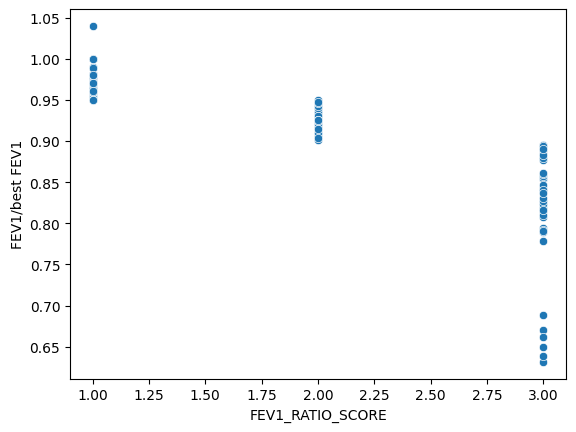

In [53]:
sns.scatterplot(data=metadata, x='FEV1_RATIO_SCORE', y='FEV1/best FEV1')

<Axes: xlabel='FEV1_Obstruction_Rank', ylabel='FVC'>

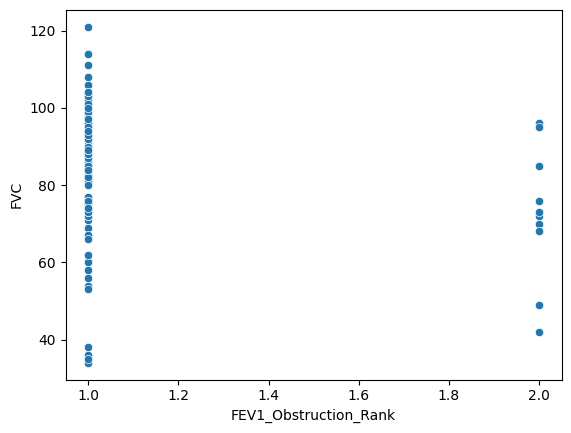

In [47]:
sns.scatterplot(data=metadata, x='FEV1_Obstruction_Rank', y='FVC')

In [51]:
tmp = metadata.copy()
tmp['FEV/FVC'] = tmp['FEV1']/tmp['FVC']

<Axes: xlabel='FEV1_Obstruction_Rank', ylabel='FEV/FVC'>

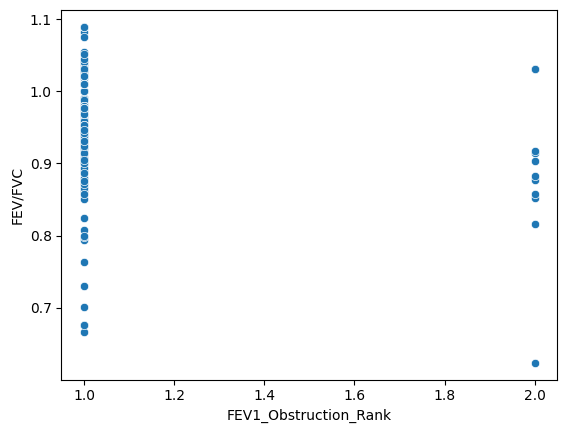

In [52]:
sns.scatterplot(data=tmp, x='FEV1_Obstruction_Rank', y='FEV/FVC')

In [55]:
for c in metadata.columns:
    if 'CS_Inquilinus' in c:
        print(f"'{c}'")

'CS_Inquilinus limosus'


In [57]:
metadata[metadata['CS_Inquilinus limosus'] == 1]

,minion,MGI,pwCF_ID,Sample date,IP vs OP,Hospital,Room,Age,Age groups,Paediatric vs Adult,...,Sum of meds,Sum of antifungals,Sum of steroid + mabs,DNA_extraction_ conc,SAGC ULN,DNA Conc. (ng/ul),Index I7,Index I5,Mean_Size_BP,Total Clusters Passing Filter (Million)
NAME,,,,,,,,,,,,,,,,,,,,,
673895_20180122_S,673895_20180122_S,673895_20180122_S,673895,2018-01-22,OP,WCH,Level 6 Treatment,16,3,Paediatric,...,2,1,0,0.638,SAGCFN_22_01775,17.2,ATTCAGAA,CAGGACGT,552,4.8


In [64]:
metadata.groupby(by='Gender').count()

,minion,MGI,pwCF_ID,Sample date,IP vs OP,Hospital,Room,Age,Age groups,Paediatric vs Adult,...,Sum of meds,Sum of antifungals,Sum of steroid + mabs,DNA_extraction_ conc,SAGC ULN,DNA Conc. (ng/ul),Index I7,Index I5,Mean_Size_BP,Total Clusters Passing Filter (Million)
Gender,,,,,,,,,,,,,,,,,,,,,
F,28,69,69,69,69,69,69,69,69,69,...,69,69,69,69,69,69,69,69,69,69
M,33,58,58,58,58,58,58,58,58,58,...,58,58,58,58,58,58,58,58,58,58
